# dft

## Synopse

Discrete 1D/2D/3D Fourier Transform.

- **F = dft(f)**

  - **F**: Output Image. 
  - **f**: Original Image. 

## Function Code

In [3]:
import numpy as np

def dft(f):
    import ia898.src as ia
    f = np.asarray(f).astype(np.float64)
    if (len(f.shape) == 1):
        m = len(f)
        A = ia.dftmatrix(f.shape[0])
        F = np.sqrt(m) * A.dot(f)
    elif (len(f.shape) == 2):
        (m, n) = f.shape
        A = ia.dftmatrix(m)
        B = ia.dftmatrix(n)
        F = np.sqrt(m * n) * (A.dot(f)).dot(B)
    else:
        (p,m,n) = f.shape
        A = ia.dftmatrix(m)
        B = ia.dftmatrix(n)
        C = ia.dftmatrix(p)
        Faux = A.dot(f)
        Faux = Faux.dot(B)
        F = np.sqrt(p)*np.sqrt(m)*np.sqrt(n)*C.dot(Faux)   
    return F

## Examples

In [3]:
testing = (__name__ == "__main__")
if testing:
    ! jupyter nbconvert --to python dft.ipynb
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia

[NbConvertApp] Converting notebook dft.ipynb to python
[NbConvertApp] Writing 3504 bytes to dft.py


### Numeric Example: comparing proposed with numpy function

In [4]:
if testing:
    
    f = np.arange(24).reshape(2,3,4) # original image with generic axis
    F = ia.dft(f)   # proposed dft
    F1 = np.fft.fftn(f) # numpy dft
    
    print('ia.dft:','\n',F.round(2),'\n')
    print('fft.fftn:','\n',F1.round(2),'\n')
    print('Equal Results? (max error)',abs(F1-F).max())

ia.dft: 
 [[[ 276. +0.j    -12.+12.j    -12. -0.j    -12.-12.j  ]
  [ -48.+27.71j    0. -0.j      0. +0.j     -0. +0.j  ]
  [ -48.-27.71j    0. +0.j     -0. +0.j     -0. +0.j  ]]

 [[-144. -0.j      0. +0.j     -0. +0.j     -0. +0.j  ]
  [   0. +0.j     -0. +0.j      0. -0.j     -0. +0.j  ]
  [  -0. +0.j     -0. +0.j     -0. -0.j     -0. -0.j  ]]] 

fft.fftn: 
 [[[ 276. +0.j    -12.+12.j    -12. +0.j    -12.-12.j  ]
  [ -48.+27.71j    0. +0.j      0. +0.j      0. +0.j  ]
  [ -48.-27.71j    0. +0.j      0. +0.j      0. +0.j  ]]

 [[-144. +0.j      0. +0.j      0. +0.j      0. +0.j  ]
  [   0. +0.j      0. +0.j      0. +0.j      0. +0.j  ]
  [   0. +0.j      0. +0.j      0. +0.j      0. +0.j  ]]] 

Equal Results? (max error) 1.20844499575e-13


### Image example: 2d circle

""
""

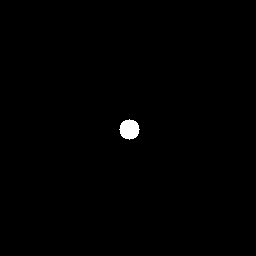

""
""

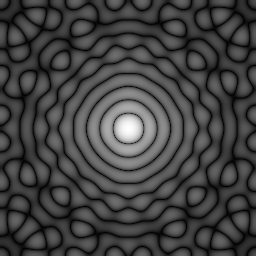

In [5]:
if testing:    
    f = ia.circle([256,256], 10, [129,129])   
    ia.adshow(f)
    F = ia.dft(f)
    Fv = ia.dftview(F)
    ia.adshow(Fv)

### Image example: 3d square 

In [6]:
if False: #testing:
    
    f = np.zeros((25,30,40))
    f[10:15,20:26,21:27] = 1
    F = ia.dft(f)
    ia.adshow(ia.normalize(ia.mosaic(f,5)),'Original Image')
    ia.adshow(ia.mosaic(ia.dftview(F),5),'Fourier Transformation')

### Comparison with other implementations

In [7]:
if testing:
    import matplotlib.image as mpimg
   
    f = mpimg.imread('../data/cameraman.tif')
    %time F1 = ia.dft(f)
    %time F2 = np.fft.fft2(f)
    print('Max difference is:', np.abs(F1-F2).max())

CPU times: user 26.5 ms, sys: 526 µs, total: 27.1 ms
Wall time: 22.4 ms
CPU times: user 5.41 ms, sys: 177 µs, total: 5.59 ms
Wall time: 2.77 ms
Max difference is: 4.95793675189e-06


## Equation

### 1D transformation

$$ \begin{matrix}
    F(u) &=& \sum_{x=0}^{N-1}f(x)\exp(-j2\pi\frac{ux}{N}) \\ 
    & & 0 \leq x < N, 0 \leq u < N \\ 
    \mathbf{F} &=& \sqrt{N} A_N \mathbf{f} 
\end{matrix} $$

### 2D transformation

$$ \begin{matrix}
    F(u,v) &=& \sum_{x=0}^{N-1}\sum_{y=0}^{M-1}f(x,y)\exp(-j2\pi(\frac{ux}{N} + \frac{vy}{M})) \\
     & & (0,0) \leq (x,y) < (N,M), (0,0) \leq (u,v) < (N,M) \\ 
    \mathbf{F} &=& \sqrt{NM} A_N \mathbf{f} A_M
\end{matrix} $$

### 3D transformation

$$ \begin{matrix}
    F(w,u,v) &=& \sum_{z=0}^{P-1}\sum_{y=0}^{M-1}\sum_{x=0}^{N-1}f(z,y,x)\exp(-j2\pi(\frac{wz}{P} + \frac{uy}{M} + \frac{vx}{N}))\\
     & & (0,0,0) \leq (z,y,x) < (P,M,N), (0,0,0) \leq (w,u,v) < (P,M,N) \\ 
    \mathbf{F} &=& \sqrt{PMN}   (A_P((A_M \mathbf{f})A_N)) 
\end{matrix} $$

## See Also

* `dftmatrix dftmatrix`  -- Kernel matrix for the DFT Transform.
* `iaidft iaidft` -- Inverse Discrete Fourier Transform.
* `dftview dftview` -- Discrete Fourier Transform Visualization.

## References

- http://en.wikipedia.org/wiki/Discrete_Fourier_transform

## Contributions

- Mariana Pinheiro, 1st semester 2011